###  <font color=green> Group 7: Alternative Data impact on Bitcoin  </font> 
<font color=green> 
1. Song Lu<br/>
2. Padey Tan<br/>
3. Jotham Teo<br/>
4. Mandy<br/>
5. Jonathan Wee<br/>
</font> 

### <font color=green> Table of Contents </font> 
<font color=green> 
1. Python Libray<br/>
2. Data Collection<br/>
&nbsp;&nbsp;&nbsp;&nbsp;2.1 Google Trends <br/>
&nbsp;&nbsp;&nbsp;&nbsp;2.2 Bitcoin API <br/>
&nbsp;&nbsp;&nbsp;&nbsp;2.3 Twitter Tweets<br/>
&nbsp;&nbsp;&nbsp;&nbsp;2.4 Pageviews - Coinbase Exchange<br/>
3. Data Model Validation<br/>
&nbsp;&nbsp;&nbsp;&nbsp;3.1 Twitter Sentimental Sentimental Analysis<br/>
&nbsp;&nbsp;&nbsp;&nbsp;3.2 Time Series <br/>
&nbsp;&nbsp;&nbsp;&nbsp;3.3 Regression<br/>
&nbsp;&nbsp;&nbsp;&nbsp;3.4 Granger<br/>
&nbsp;&nbsp;&nbsp;&nbsp;3.5 Pearson Correlation<br/>
4. Multi-Factor Regression<br/>
</font> 

### <font color=green> 1. Python Library </font> 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from scipy.stats import pearsonr, zscore, f
import seaborn as sns
from pytrends.request import TrendReq
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import quandl
import json

/Users/song/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### <font color=green> 2. Data Collection </font> 

### <font color=green> 2.1 Google Trends </font> 

```python
# Step 1
# Open Google Trends
# Download the data into excel CSV file
# Key word = 'Bitcoin'

# Github Openscoure API Not updated; numbers are incorrect

```

In [2]:
df_google = pd.read_csv('Google.csv', skiprows=2)
df_google.head()


Week  Bitcoin: (Worldwide)
0   1/1/2017                    20
1   8/1/2017                    21
2  15/1/2017                    18
3  22/1/2017                    18
4  29/1/2017                    18

### <font color=green> 2.2 Bitcoin API </font> 

```python
# Commenting because of API limit; causing error once exceed limit
"""
# Bitcoin Number of Transactions Excluding Popular Addresses
# Data showing the total number of unique bitcoin 
#transactions per day excluding those which involve any of the top 100 most popular addresses popular addresses.

# pull data from quandl package with date range & weekly
# Bitcoin price, volume
btc = quandl.get("BITFINEX/BTCUSD", start_date="2017-01-01", end_date="2018-03-31", collapse="weekly")  

# Save to Excel
Df_comb.to_csv('btc_price.csv')

# 1
# Bitcoin Number of Unique Bitcoin Addresses Used  #*****
# Desc: Number of unique bitcoin addresses used per day.
BTC_address = quandl.get("BCHAIN/NADDU", start_date="2017-01-01", end_date="2018-03-31", collapse="weekly")


Df_comb = pd.DataFrame({'BTC Price':btc['Last'] , 'BTC Add':BTC_address['Value']}, index = BTC_address.index)

# Save to Excel
Df_comb.to_csv('df_BitcoinFactors.csv')
"""
```

In [3]:
df_BitcoinFactors = pd.read_csv('df_BitcoinFactors.csv')
df_BitcoinFactors.head()

Date  BTC Price  BTC Add
0   1/1/2017     966.61   449831
1   8/1/2017     908.10   503340
2  15/1/2017     815.85   446468
3  22/1/2017     924.02   484668
4  29/1/2017     919.43   461291

### <font color=green> 2.3 Twitter Tweets </font> 

##### List of influencial Twitter account on bitcoins: 
aantonop;
BitcoinNetworks;
BitcoinMagazine;
BTCTN;
BTCnewsBOT;
BTCNewsletter;
Coindesk;
Cointelegraph;
ForbesCrypto;
RedditBTC;
NeerajKA;
VitalikButerin;
SatoshiLite;
WhalePanda;
NickSzabo4;
gavinandresen;
brian_armstrong;
starkness;
twobitidiot;
lopp;
rogerkver;
Excellion;
ErikVoorhees;
TuurDemeester

```python
# Step 1
# Open Command Prompt
# Set the directory in command prompt 
# Step 2
"""
twitterscraper "Bitcoin OR BTC: #Twitter account# " " -l 10000 --lang english -p 15 -bd 2017-01-01 -ed 2018-04-01 -o bitcoin_tweets.json
"""
# Replace #Twitter account# with the influencial twitter accounts above
# Step 3
# Run the code below to save Tweets into excel file
"""
import json
import pandas as pd

data = pd.read_json('bitcoin_tweets.json')
data = data.drop(['html','url'], axis=1)

# Write Tweets to Excel
writer = pd.ExcelWriter('output.xlsx')
data.to_excel(writer,'Sheet1')
writer.save()
"""
# Step 4
# Lastly rename excel accordingly to twitter account
```

### <font color=green> 2.4 Pageviews - Coinbase Exchange </font> 

```python
# Step 1
# Open Alexa trail account to get Webpage Activity
# Download the data into excel CSV file
# The Webpage Activity is given as:
#    Data =  Number of Coinbase Webpage visits/ Total number of whole whole website visits
```

In [4]:
df_pageviews = pd.read_csv('PageviewsCoinbase.csv', skiprows=6)
df_pageviews.head()
# Decided to use only coinbase data set 

Date       Metric  bitfinex.com  binance.com  coinbase.com
0  4/22/2016  Pageviews %      0.000001          NaN      0.000012
1  4/23/2016  Pageviews %      0.000001          NaN      0.000010
2  4/24/2016  Pageviews %      0.000002          NaN      0.000015
3  4/25/2016  Pageviews %      0.000002          NaN      0.000009
4  4/26/2016  Pageviews %      0.000002          NaN      0.000018

###  <font color=green> Function for Regression test | Granger Causality test | Pearson Correlation test  </font> 

In [5]:
def test(factor_series, result, df_combine):

    # combine into a dataframe for testing
    df_test = pd.DataFrame(index=df_combine.index)
    df_test[factor_series] = df_combine[factor_series]
    df_test['returns'] = df_combine['BTC Returns']
    df_test = df_test.astype(float)


#    print(df_test.head())
    

    # Regression test
    if result == "regression":
        
        print(factor_series)
        reg_results = sm.OLS(df_test['returns'].astype(float), \
                             sm.add_constant(df_test[factor_series].astype(float))).fit()
        print(reg_results.summary())
#        plt.rc('figure', figsize=(12, 8))
#        plt.text(0.01,0.01,str(reg_results.summary()),{'fontsize': 3}, fontproperties = 'monospace')
#        plt.axis('off')
#        plt.tight_layout()
#        plt.savefig( factor_series +'table.png')
#        plt.show()
        
    # Granger causality test
    elif result == "granger":
        
        print(factor_series)
        gc_results = grangercausalitytests( df_test, maxlag=4, addconst=True, verbose=True)
        optimal_lag = -1
        F_test = -1.0
        for key in gc_results.keys():
            _F_test_ = gc_results[key][0]['params_ftest'][0]
            if _F_test_ > F_test:
                F_test = _F_test_
                optimal_lag = key
        return optimal_lag, gc_results
        
    # Pearson correlation test
    elif result == "pearson":
        print(factor_series)
        pc_results = pearsonr(df_test['returns'].astype(float), df_test[factor_series].astype(float))
        print("Pearson's Correlation Coefficient, p-value: " + str(pc_results))
        return pc_results
    
    # For faster results  
    elif result == "all":
        print(factor_series)
        reg_results = sm.OLS(df_test['returns'].astype(float), \
                             sm.add_constant(df_test[factor_series].astype(float))).fit()
        print(reg_results.summary())
#        plt.rc('figure', figsize=(9, 5))
#        plt.text(0.01,0.01,str(reg_results.summary()),{'fontsize': 3}, fontproperties = 'monospace')
#        plt.axis('off')
#        plt.tight_layout()
#        plt.savefig( factor_series +'table.png')
#        plt.show()

        print(factor_series)
        gc_results = grangercausalitytests(df_test, maxlag=8, addconst=True, verbose=True)

        
        print(factor_series)
        pc_results = pearsonr(df_test['returns'].astype(float), df_test[factor_series].astype(float))
        print("Pearson's Correlation Coefficient, p-value: " + str(pc_results))

### <font color=green> 3. Data Model Validation </font> 

### <font color=green> 3.1 Twitter Sentimental Analysis </font> 

In [6]:
#%% Do Twitter Sentimental Analysis - Vader
df_sa = pd.DataFrame(index=['Sentiment', 'Price'], columns=range(1, 16))
df_full = pd.DataFrame()

# Twitter Account Users
users = ['aantonop','BitcoinNetworks','BitcoinMagazine','BTCTN','BTCnewsBOT','BTCNewsletter','Coindesk','Cointelegraph',\
         'ForbesCrypto','RedditBTC','NeerajKA','VitalikButerin','SatoshiLite','WhalePanda','NickSzabo4','gavinandresen',\
         'brian_armstrong','starkness','twobitidiot','lopp','rogerkver','Excellion','ErikVoorhees','TuurDemeester']

# import excel twitter output spreadsheets
for i in users:
    xl_output = pd.read_excel(str(i) + '.xlsx')

    # drop columns which are not needed
    xl_output = xl_output.drop(columns=['fullname', 'id', 'likes', 'replies', 'retweets', 'user'])
    xl_output = xl_output.replace(0, np.nan)
    xl_output = xl_output.dropna(axis=0, how='any')
    xl_output['sentiment'] = np.nan

    # conduct Vader sentiment analysis on data
    analyzer = SentimentIntensityAnalyzer()
    for j in xl_output.index:
        sentence = xl_output.loc[j]['text']
        xl_output.at[j, 'sentiment'] = analyzer.polarity_scores(sentence)['compound']

    # store monthly sentiment scores
    df_sa.loc['Sentiment'][i] = xl_output['sentiment'].mean()

    # full daily data
    df_full = pd.concat([df_full, xl_output])
    
# adjust data
df_full = df_full.sort_values('timestamp')
df_full = df_full.set_index('timestamp')
df_full2 = df_full.resample('W', how='mean')
df_full2.index = df_full2.index.astype(str).str.slice(0, 10)

/Users/song/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()


In [7]:
# pull data from quandl package with date range & weekly
df_btc = pd.read_csv('btc_price.csv')
df_btc.index = df_full2.index


# Create dataframe to consildate reseults
df_tweet = pd.DataFrame(columns = ['BTC Returns', 'sentiment'])
df_tweet['sentiment'] = df_full2['sentiment'].pct_change(1)
df_tweet['BTC Returns'] = df_btc['Last'].pct_change(1)

#df_tweet['sentiment'] = np.log(df_full2['sentiment']/df_full2['sentiment'].shift(1))
#df_tweet['BTC Returns'] = np.log(df_btc['Last']/df_btc['Last'].shift(1))

df_tweet.dropna(inplace = True)
df_tweet = df_tweet.astype(float)


for col in df_tweet.columns[1:]:
    test(col, 'all', df_tweet)        
        

sentiment
                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.6491
Date:                Tue, 01 May 2018   Prob (F-statistic):              0.423
Time:                        15:54:29   Log-Likelihood:                 26.743
No. Observations:                  65   AIC:                            -49.49
Df Residuals:                      63   BIC:                            -45.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0405      0.020      1.98

<font color=green> Twitter Sentimental Analysis note significant </font> 

### <font color=green> 3.2 Times Series </font> 

In [8]:
#%% Import Significant Results        
        
# Sample Codes for Research Methods #
# Group 7

# Conslidated the data - BTC last price, Google Trends, PageViews, BTC Address 

# pull data from excel
df_comb = pd.read_excel('Project Data.xlsx')
df_comb = df_comb.set_index('Date')
# Scaling the data factor to prevent multicollinearity errors
#df_comb['BTC Add'] = df_comb['BTC Add'] / 10000
# Scaling the data factor to prevent multicollinearity errors
#df_comb['CoinBase'] = df_comb['CoinBase'] * 10000

# Using Change percent
df_comb = df_comb.pct_change(1)

df_comb.columns = ['BTC Returns', 'BTC Address','Google','PageViews']
df_comb = df_comb[['BTC Returns', 'Google','PageViews','BTC Address']] #rearragning order for heatmap

df_comb.dropna(inplace = True)
df_comb.head()

BTC Returns    Google  PageViews  BTC Address
Date                                                     
2017-01-08    -0.060531  0.050000   0.158961     0.118954
2017-01-15    -0.101586 -0.142857  -0.293769    -0.112989
2017-01-22     0.132586  0.000000  -0.088235     0.085560
2017-01-29    -0.004967  0.000000  -0.005120    -0.048233
2017-02-05     0.121456 -0.055556   0.067422     0.084127

Time Series


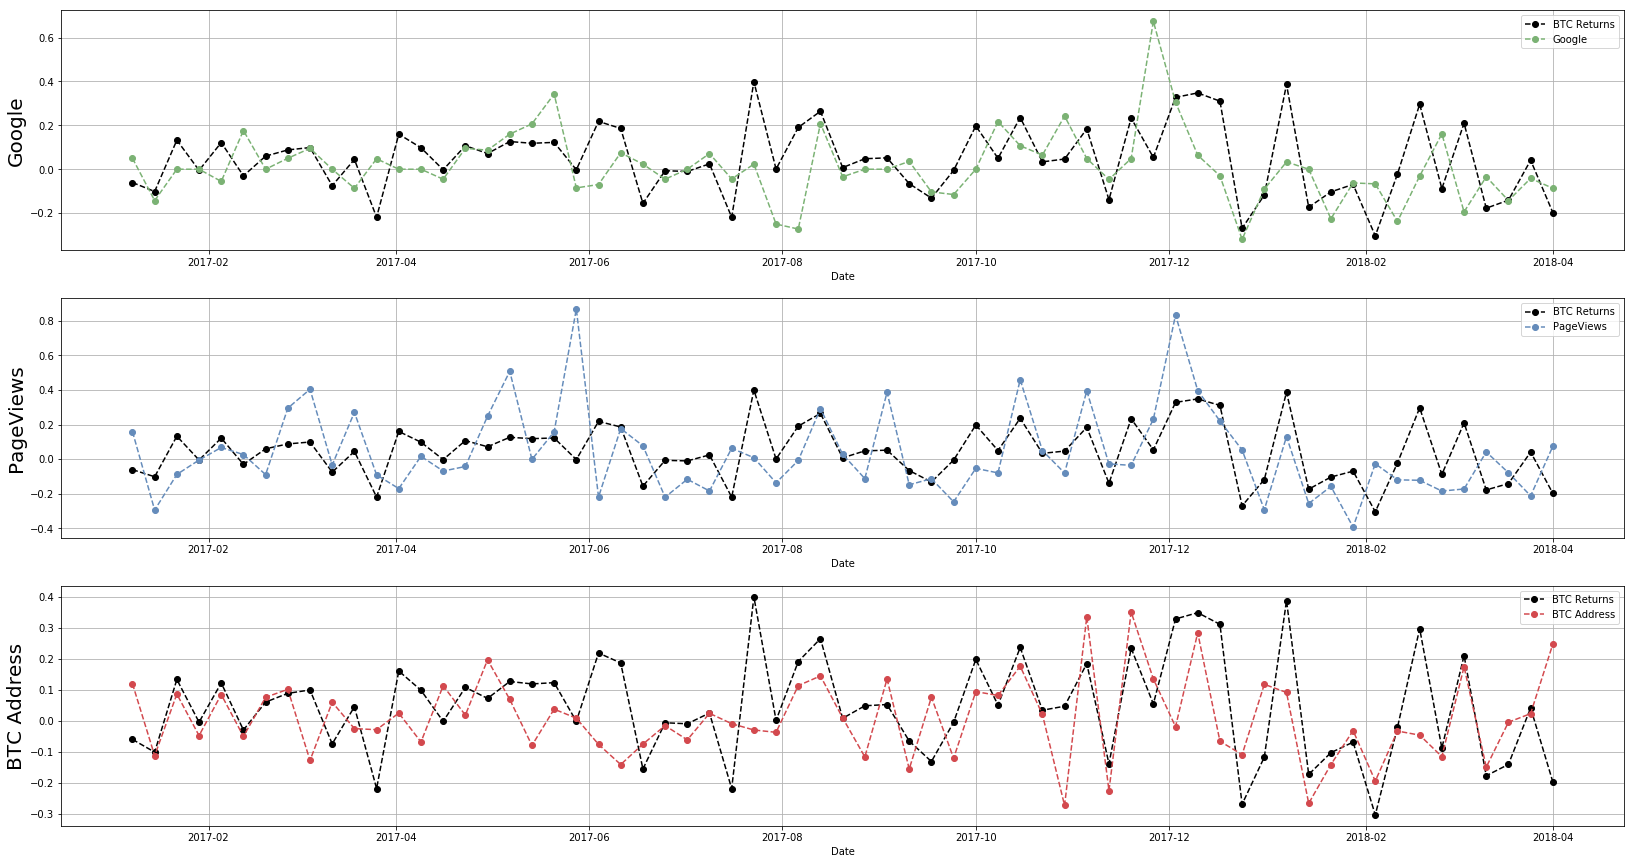

In [9]:
#%% plot Time-Series        

# Plot the Time Series
df_test = df_comb.copy()
# Normalising the Timeseries
# df_test = np.log(df_test / df_test.shift(1))
#for col in df_test.columns:
#    df_test[col] = zscore(df_test[col])
df_test = df_test.astype(float)
  
print("Time Series")
colours1 = ['black','xkcd:faded green', 'xkcd:faded blue', 'xkcd:faded red']

fig = plt.figure(figsize=(28,15))

for i, x in enumerate(df_test.columns[1:]):
    ax=plt.subplot(3,1,i+1)

    plt.plot(df_test.index, df_test['BTC Returns'],color= colours1[0], marker='o',\
             linestyle='dashed', label = 'BTC Returns' )
    
    plt.plot(df_test.index, df_test[x],color= colours1[i+1], marker='o', \
             linestyle='dashed', label = x )
    plt.grid(True)
    plt.legend()
    plt.ylabel(x, fontsize= 20)
    plt.xlabel('Date')

plt.savefig('TimeSeries.png')    
plt.show()    

### <font color=green> Dicky Fuller Test for stationary </font> 

In [10]:
#%% Dicky Fuller 

# To test if time-series is stationary 
station = df_comb.copy()

df_dickey = pd.DataFrame(index = ['ADF Statistic','P-Value','Critical Values 1%','Critical Values 5%', \
                                  'Critical Values 10%'] ,columns =station.columns )

for col,i in enumerate(station.columns):
#    print('Dickey Fuller Test:', i)
    result = adfuller(station[i])
#    print('ADF Statistic: %f' % result[0])
    df_dickey.iloc[0, col] = result[0]
#    print('p-value: %f' % result[1])
    df_dickey.iloc[1, col] = result[1]
#    print('Critical Values:')
    idd = 0 
    for key, value in result[4].items():
#        print('\t%s: %.3f' % (key, value))
        df_dickey.iloc[2+idd, col] = value
        idd +=1

#df_dickey = df_dickey.astype('float') 
df_dickey

BTC Returns       Google   PageViews  BTC Address
ADF Statistic           -8.27295     -5.79678    -6.70558     -10.2479
P-Value              4.73896e-13  4.73166e-07  3.7926e-09  4.56528e-18
Critical Values 1%      -3.53693     -3.53693    -3.53693     -3.53693
Critical Values 5%      -2.90789     -2.90789    -2.90789     -2.90789
Critical Values 10%     -2.59149     -2.59149    -2.59149     -2.59149

### <font color=green> 3.3 Regression </font> 

In [11]:
#%%  Regression
# test each factor
for i in df_comb.columns[1:]:
    test(i, 'regression', df_comb)   

Google
                            OLS Regression Results                            
Dep. Variable:                returns   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     5.861
Date:                Tue, 01 May 2018   Prob (F-statistic):             0.0184
Time:                        15:54:30   Log-Likelihood:                 29.300
No. Observations:                  65   AIC:                            -54.60
Df Residuals:                      63   BIC:                            -50.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0395      0.019      2.028  

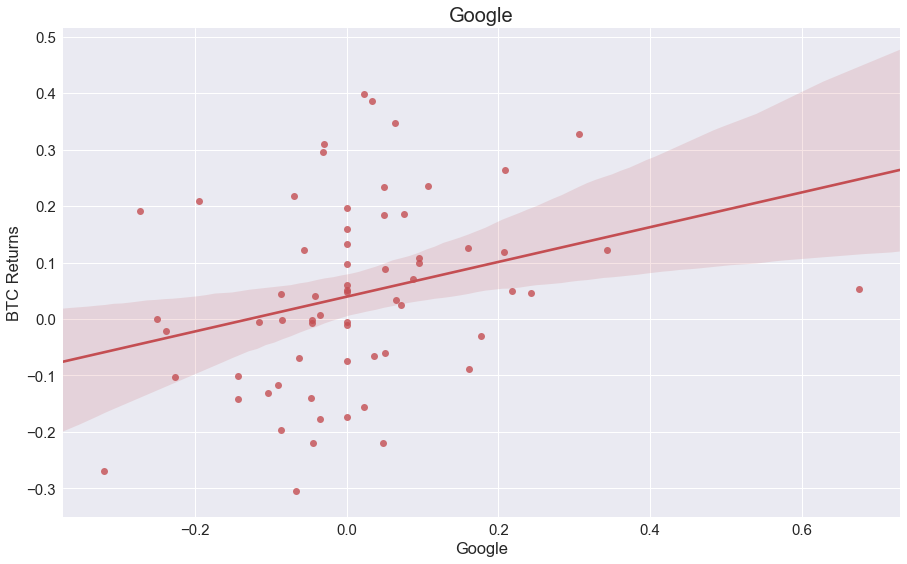

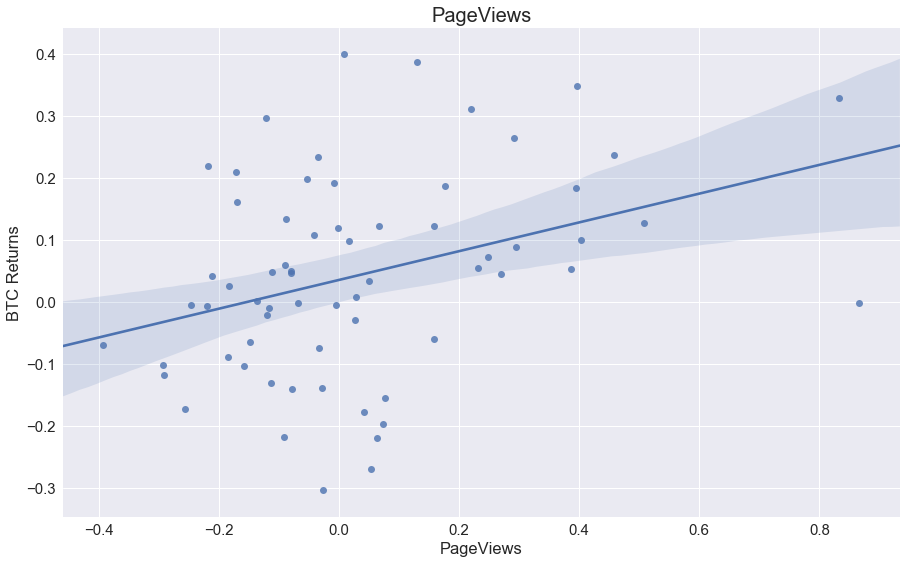

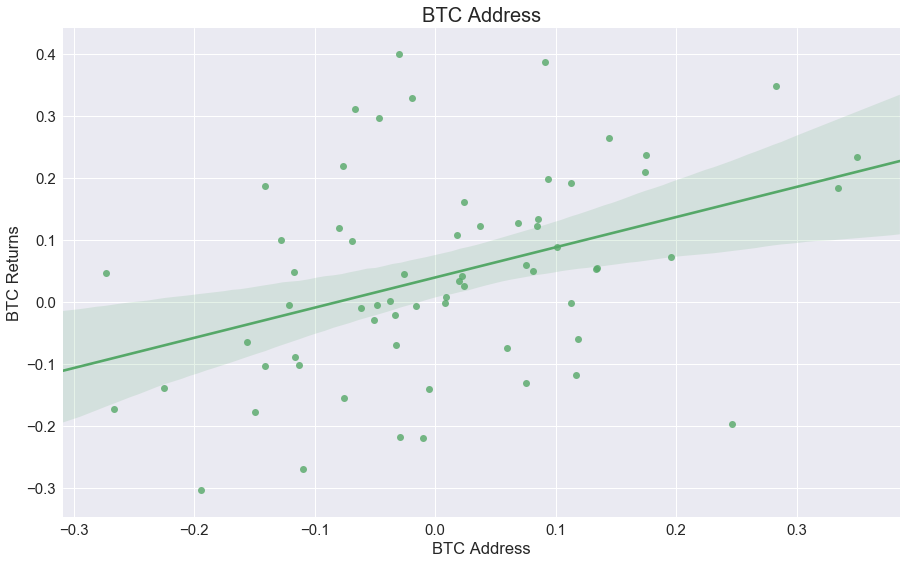

In [12]:
#%% Regression Graph 
colours = ['r','b','g', 'k' ]
sns.set(color_codes=True, font_scale=1.5)
for id,x in enumerate(df_comb.columns[1:]):
    
    plt.subplots(figsize=(15, 9))
    sns.regplot(df_comb[x],df_comb['BTC Returns'], color=colours[id])
    plt.title(x , fontsize= 20)
    plt.savefig(x+'.png')
    plt.show()       

### <font color=green> 3.4 Granger </font> 

In [13]:
#%%  # Granger Causality Test

df_granger = pd.DataFrame(index = ['Optimal lag'],columns = df_comb.columns[1:])    

df_gstat = pd.DataFrame(columns = df_granger.columns)
df_gstat.loc['statistic', :] = [['F-critical', 'F-test', 'P-value']]
# test each factor
for id,i in enumerate(df_granger.columns):

    df_granger.loc['Optimal lag', i], gstat = test(df_comb.columns[id+1], 'granger', df_comb)   
    print(" ")
    print(" ")
    for key in gstat.keys():
            denom, num = gstat[key][0]['params_ftest'][2] , gstat[key][0]['params_ftest'][3]
            df_gstat.loc['lag='+str(key), i ] = np.array([f.pdf(0.9, dfn=num, dfd=denom),\
                                                                 gstat[key][0]['params_ftest'][0],\
                                                                 gstat[key][0]['params_ftest'][1]],dtype = float)
            

Google

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.9254  , p=0.0923  , df_denom=61, df_num=1
ssr based chi2 test:   chi2=3.0693  , p=0.0798  , df=1
likelihood ratio test: chi2=2.9979  , p=0.0834  , df=1
parameter F test:         F=2.9254  , p=0.0923  , df_denom=61, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0750  , p=0.0538  , df_denom=58, df_num=2
ssr based chi2 test:   chi2=6.6801  , p=0.0354  , df=2
likelihood ratio test: chi2=6.3491  , p=0.0418  , df=2
parameter F test:         F=3.0750  , p=0.0538  , df_denom=58, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5919  , p=0.0619  , df_denom=55, df_num=3
ssr based chi2 test:   chi2=8.7652  , p=0.0326  , df=3
likelihood ratio test: chi2=8.1984  , p=0.0421  , df=3
parameter F test:         F=2.5919  , p=0.0619  , df_denom=55, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8910  , p=0.1259 

### <font color=green> 3.5 Pearson Correlation </font> 

In [14]:
df_pearson = pd.DataFrame(columns = df_comb.columns)
for i in df_comb.columns[1:]:
    df_pearson.loc['Coeff' , i],df_pearson.loc['P-value' , i] = test(i, 'pearson', df_comb)    

df_pearson = df_pearson.iloc[:, 1:]
df_pearson = df_pearson.astype(float)

Google
Pearson's Correlation Coefficient, p-value: (0.2917315908237461, 0.01837762483080449)
PageViews
Pearson's Correlation Coefficient, p-value: (0.3523767547264496, 0.003992094705700535)
BTC Address
Pearson's Correlation Coefficient, p-value: (0.3929031132201988, 0.0012058869395931901)


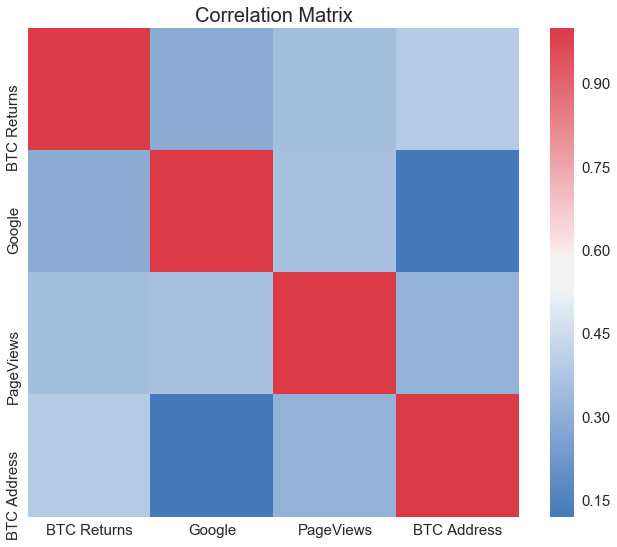

In [15]:
#%% Correlation table
corr = df_comb.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap

cmap = sns.diverging_palette(1690, 10, sep=20, as_cmap=True)
# Plot
sns.heatmap(corr, cmap=cmap)
plt.title('Correlation Matrix', fontsize= 20)
plt.savefig('pearson.png')
plt.show() 

### <font color=green> 4 Mutil-Factor Regression </font> 

In [16]:
#%% Multi-Factor Regression

df_multi = df_comb.copy()
df_multi = df_multi.astype(float)

reg_results = sm.OLS(df_multi['BTC Returns'].astype(float), sm.add_constant(df_multi.iloc[:, 1:].astype(float))).fit()
print(reg_results.summary())    

                            OLS Regression Results                            
Dep. Variable:            BTC Returns   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     6.541
Date:                Tue, 01 May 2018   Prob (F-statistic):           0.000659
Time:                        15:54:32   Log-Likelihood:                 35.474
No. Observations:                  65   AIC:                            -62.95
Df Residuals:                      61   BIC:                            -54.25
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0333      0.018      1.834      

###  <font color=green> Thank you for reading! =) </font> 